# Hartree-Fock Theory: History, Theory, and Implementation

## An Interactive Guide to the Foundation of Quantum Chemistry

**Author:** Educational Tutorial  
**Version:** 4.1  
**Date:** 2026  

---

This notebook provides a comprehensive journey through Hartree-Fock theory, from its historical origins to modern computational implementation.

## Table of Contents

1. [Historical Context](#history)
2. [The Quantum Mechanical Problem](#problem)
3. [Mathematical Foundation](#math)
4. [The Hartree-Fock Approximation](#hf-approximation)
5. [Roothaan-Hall Equations](#roothaan)
6. [Computational Implementation](#implementation)
7. [Interactive Examples](#examples)
8. [Visualizations](#visualizations)
9. [Modern Extensions](#extensions)
10. [References](#references)

<a id='history'></a>
## 1. Historical Context

### The Birth of Quantum Mechanics (1920s)

<img src="pics/Schrodiger-Heisenberg.jpg" height="400">

*Fig. 1: The founders of quantum mechanics (Werner Heisenberg and Erwin Schrödinger) whose wave equation forms the basis of all modern quantum chemistry*

The story of Hartree-Fock theory begins with the Schrödinger equation in 1926:

$$\hat{H}\Psi = E\Psi$$

For a many-electron system, this becomes:

$$\left[-\sum_i \frac{1}{2}\nabla_i^2 - \sum_i\sum_A \frac{Z_A}{r_{iA}} + \sum_{i<j}\frac{1}{r_{ij}} + \sum_{A<B}\frac{Z_AZ_B}{R_{AB}}\right]\Psi = E\Psi$$

**The Problem:** This equation cannot be solved analytically for more than two particles!

### Douglas Hartree (1928)

<img src="pics/Douglas_Hartree.jpg" height="400">

*Fig. 2: Douglas Hartree (1897-1958), British physicist and mathematician*

**Key Contribution:** Proposed the **self-consistent field (SCF)** method

**The Idea:** Each electron moves in the average field of all other electrons.

Hartree's approach:
1. Approximate the many-electron wavefunction as a product: $\Psi = \phi_1(r_1)\phi_2(r_2)...\phi_N(r_N)$
2. Solve for each electron in the field of others
3. Iterate until self-consistency

**Limitation:** Did not include electron exchange (Pauli principle)

### Vladimir Fock (1930)

<img src="pics/Vladimir_Fock.jpg" height="400">

*Fig. 3: Vladimir Fock (1898-1974), Soviet physicist*

**Key Contribution:** Incorporated the **Pauli exclusion principle** via antisymmetry

**The Hartree-Fock Wavefunction:**

$$\Psi_{HF} = \mathcal{A}\{\phi_1(r_1)\phi_2(r_2)...\phi_N(r_N)\} = \frac{1}{\sqrt{N!}}\begin{vmatrix}
\phi_1(r_1) & \phi_2(r_1) & ... & \phi_N(r_1) \\\
\phi_1(r_2) & \phi_2(r_2) & ... & \phi_N(r_2) \\\
\vdots & \vdots & \ddots & \vdots \\\
\phi_1(r_N) & \phi_2(r_N) & ... & \phi_N(r_N)
\end{vmatrix}$$

This **Slater determinant** ensures the wavefunction is antisymmetric.

### John Slater (1929-1930)

<img src="pics/John_C_Slater_1949.jpg" height="400">

*Fig. 4: John C. Slater (1900-1976), American physicist*

**Contributions:**
- Developed the determinantal form (Slater determinant)
- Simplified HF equations
- Introduced Slater-type orbitals (STOs): $\phi(r) \propto r^{n-1}e^{-\zeta r}Y_{lm}(\theta,\phi)$

### Clemens Roothaan (1951) and George Hall (1951)

<img src="pics/Clemens%20Roothaan.jpg" height="400"><img src="pics/george-hall.jpg" height="400">

*Fig. 5: The scientists who made HF theory computationally practical*

**Revolutionary Contribution:** Expressed MOs as linear combinations of basis functions

$$\phi_i = \sum_\mu C_{\mu i} \chi_\mu$$

This transforms the integro-differential HF equations into **matrix equations** that computers can solve!

**The Roothaan-Hall Equations:**

$$\mathbf{FC} = \mathbf{SC}\boldsymbol{\epsilon}$$

where:
- $\mathbf{F}$ = Fock matrix
- $\mathbf{C}$ = MO coefficient matrix
- $\mathbf{S}$ = Overlap matrix
- $\boldsymbol{\epsilon}$ = Orbital energies

### The Computer Age (1960s-Present)

<img src="pics/IBM.jpg" height="400">

*Fig. 6: Early computers (IBM 7090 shown) enabled the first practical HF calculations (ref: columbia.edu)*

**Key Developments:**

**S. F. Boys (1950):** Introduced Gaussian basis functions
$$\phi(r) \propto e^{-\alpha r^2}$$

**Advantages:**
- Integrals are analytically solvable
- Computationally efficient
- Product of Gaussians is a Gaussian!

**Peter Pulay (1980, 1982):** DIIS (Direct Inversion in Iterative Subspace)
- Dramatically accelerated SCF convergence
- Made large-scale calculations practical

**Modern Era (1990s-Present):**
- Density Functional Theory (DFT) complemented HF
- Post-HF methods (MP2, CCSD) built on HF foundations
- HF remains the starting point for nearly all quantum chemistry

<a id='problem'></a>
## 2. The Quantum Mechanical Problem

### The Non-Relativistic Time-Independent Schrödinger Equation

For a molecule with $N$ electrons and $M$ nuclei:

$$\hat{H}\Psi(\mathbf{r}_1, \mathbf{r}_2, ..., \mathbf{r}_N; \mathbf{R}_1, ..., \mathbf{R}_M) = E\Psi(\mathbf{r}_1, \mathbf{r}_2, ..., \mathbf{r}_N; \mathbf{R}_1, ..., \mathbf{R}_M)$$

### The Molecular Hamiltonian

In atomic units ($\hbar = m_e = e = 1$):

$$\hat{H} = \underbrace{-\sum_{i=1}^N \frac{1}{2}\nabla_i^2}_{\text{Kinetic: electrons}} + \underbrace{-\sum_{A=1}^M \frac{1}{2M_A}\nabla_A^2}_{\text{Kinetic: nuclei}}$$
$$+ \underbrace{\sum_{i<j}^N \frac{1}{r_{ij}}}_{\text{e-e repulsion}} + \underbrace{\sum_{A<B}^M \frac{Z_AZ_B}{R_{AB}}}_{\text{Nuclear repulsion}} - \underbrace{\sum_{i=1}^N\sum_{A=1}^M \frac{Z_A}{r_{iA}}}_{\text{e-n attraction}}$$

### Born-Oppenheimer Approximation

**Key Insight:** Nuclei are much heavier than electrons ($M_A \approx 1836 m_e$ for protons)

**Approximation:** Electrons move in the field of fixed nuclei

**Electronic Hamiltonian:**

$$\hat{H}_{\text{elec}} = -\sum_{i=1}^N \frac{1}{2}\nabla_i^2 - \sum_{i=1}^N\sum_{A=1}^M \frac{Z_A}{r_{iA}} + \sum_{i<j}^N \frac{1}{r_{ij}}$$

$$= \sum_{i=1}^N \hat{h}(i) + \sum_{i<j}^N \frac{1}{r_{ij}}$$

where $\hat{h}(i) = -\frac{1}{2}\nabla_i^2 - \sum_A \frac{Z_A}{r_{iA}}$ is the **one-electron operator**

### The Many-Body Problem

**Challenge:** The electron-electron repulsion term $\sum_{i<j} 1/r_{ij}$ couples all electrons

**Cannot write:** $\Psi = \phi_1(r_1)\phi_2(r_2)...\phi_N(r_N)$ (product wavefunction)

**Must satisfy:**
1. Pauli exclusion principle (antisymmetry)
2. Account for electron-electron interaction

**Hartree-Fock Approximation:** Use a single Slater determinant as the best possible product-like wavefunction

<a id='math'></a>
## 3. Mathematical Foundation

### The Variational Principle

**Theorem:** For any trial wavefunction $\Psi_{\text{trial}}$:

$$E[\Psi_{\text{trial}}] = \frac{\langle \Psi_{\text{trial}}|\hat{H}|\Psi_{\text{trial}}\rangle}{\langle\Psi_{\text{trial}}|\Psi_{\text{trial}}\rangle} \geq E_0$$

where $E_0$ is the true ground state energy.

**Strategy:** Minimize $E[\Psi]$ by optimizing parameters in $\Psi$

### Slater Determinant

For $N$ electrons in spin-orbitals $\{\chi_i\}$:

$$|\Psi\rangle = \frac{1}{\sqrt{N!}}\begin{vmatrix}
\chi_1(\mathbf{x}_1) & \chi_2(\mathbf{x}_1) & \cdots & \chi_N(\mathbf{x}_1) \\\
\chi_1(\mathbf{x}_2) & \chi_2(\mathbf{x}_2) & \cdots & \chi_N(\mathbf{x}_2) \\\
\vdots & \vdots & \ddots & \vdots \\\
\chi_1(\mathbf{x}_N) & \chi_2(\mathbf{x}_N) & \cdots & \chi_N(\mathbf{x}_N)
\end{vmatrix}$$

where $\mathbf{x}_i$ represents both spatial ($\mathbf{r}_i$) and spin ($\sigma_i$) coordinates.

**Properties:**
1. **Antisymmetry:** Swapping two electrons changes sign
2. **Pauli principle:** Two electrons cannot have identical quantum numbers
3. **Orthonormality:** $\langle\chi_i|\chi_j\rangle = \delta_{ij}$

### Energy of a Slater Determinant

Using the electronic Hamiltonian:

$$E = \sum_{i=1}^N \langle \chi_i|\hat{h}|\chi_i\rangle + \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N \left[\langle \chi_i\chi_j||\chi_i\chi_j\rangle - \langle \chi_i\chi_j||\chi_j\chi_i\rangle\right]$$

where:
- $\langle \chi_i|\hat{h}|\chi_i\rangle = \int \chi_i^*(1)\hat{h}(1)\chi_i(1)d\mathbf{x}_1$ (one-electron integral)
- $\langle \chi_i\chi_j||\chi_i\chi_j\rangle = \int\int \chi_i^*(1)\chi_j^*(2)\frac{1}{r_{12}}\chi_i(1)\chi_j(2)d\mathbf{x}_1d\mathbf{x}_2$ (two-electron integral)

Simplifying:

$$E = \sum_{i=1}^N h_i + \frac{1}{2}\sum_{i,j=1}^N (J_{ij} - K_{ij})$$

where:
- $J_{ij}$ = **Coulomb integral** (classical electrostatic repulsion)
- $K_{ij}$ = **Exchange integral** (quantum effect from antisymmetry)

<a id='hf-approximation'></a>
## 4. The Hartree-Fock Approximation

### Variational Optimization

**Goal:** Find spin-orbitals $\{\chi_i\}$ that minimize $E$ subject to orthonormality: $\langle\chi_i|\chi_j\rangle = \delta_{ij}$

**Method:** Lagrange multipliers

$$\mathcal{L} = E[\{\chi_i\}] - \sum_{i,j}\epsilon_{ij}(\langle\chi_i|\chi_j\rangle - \delta_{ij})$$

### The Hartree-Fock Equations

Minimizing $\mathcal{L}$ yields:

$$\hat{f}(i)\chi_i = \epsilon_i\chi_i$$

where $\hat{f}$ is the **Fock operator:**

$$\hat{f}(i) = \hat{h}(i) + \sum_{j=1}^N [\hat{J}_j(i) - \hat{K}_j(i)]$$

**Components:**

1. **Core Hamiltonian:** $\hat{h}(i) = -\frac{1}{2}\nabla_i^2 - \sum_A \frac{Z_A}{r_{iA}}$

2. **Coulomb operator:** $\hat{J}_j(i)\chi_i(1) = \left[\int \chi_j^*(2)\frac{1}{r_{12}}\chi_j(2)d\mathbf{x}_2\right]\chi_i(1)$

3. **Exchange operator:** $\hat{K}_j(i)\chi_i(1) = \left[\int \chi_j^*(2)\frac{1}{r_{12}}\chi_i(2)d\mathbf{x}_2\right]\chi_j(1)$

### Physical Interpretation

Each electron moves in:
1. The field of the nuclei ($\hat{h}$)
2. The **average** Coulomb field of other electrons ($\hat{J}_j$)
3. A quantum **exchange** interaction ($\hat{K}_j$) that has no classical analog

### Self-Consistency

**The Challenge:** The Fock operator depends on its own solutions!

$$\hat{f} = \hat{f}[\{\chi_i\}]$$

**Solution:** **Self-Consistent Field (SCF)** iterative procedure:

1. **Guess** initial orbitals $\{\chi_i^{(0)}\}$
2. **Build** Fock operator $\hat{f}[\{\chi_i^{(n)}\}]$
3. **Solve** $\hat{f}\chi_i^{(n+1)} = \epsilon_i\chi_i^{(n+1)}$
4. **Repeat** steps 2-3 until convergence: $E^{(n+1)} \approx E^{(n)}$



<a id='roothaan'></a>
## 5. Roothaan-Hall Equations

### LCAO Approximation

**Ansatz:** Express molecular orbitals as linear combinations of atomic orbitals (LCAO):

$$\phi_i = \sum_{\mu=1}^K C_{\mu i} \chi_\mu$$

where:
- $\phi_i$ = molecular orbital $i$
- $\chi_\mu$ = basis function $\mu$ (e.g., Gaussian)
- $C_{\mu i}$ = expansion coefficient
- $K$ = number of basis functions

### Matrix Formulation

Substituting LCAO into HF equations yields:

$$\mathbf{FC} = \mathbf{SC}\boldsymbol{\epsilon}$$

**The Roothaan-Hall Equation** (generalized eigenvalue problem)

### Matrix Elements

**Fock Matrix:**
$$F_{\mu\nu} = H_{\mu\nu}^{\text{core}} + \sum_{\lambda\sigma}P_{\lambda\sigma}[(\mu\nu|\lambda\sigma) - \frac{1}{2}(\mu\lambda|\nu\sigma)]$$

**Core Hamiltonian:**
$$H_{\mu\nu}^{\text{core}} = \int \chi_\mu^*(1)\left[-\frac{1}{2}\nabla_1^2 - \sum_A\frac{Z_A}{r_{1A}}\right]\chi_\nu(1)d\mathbf{r}_1$$

**Overlap Matrix:**
$$S_{\mu\nu} = \int \chi_\mu^*(\mathbf{r})\chi_\nu(\mathbf{r})d\mathbf{r}$$

**Density Matrix:**
$$P_{\mu\nu} = 2\sum_{i=1}^{N/2} C_{\mu i}C_{\nu i}$$
(for closed-shell RHF)

**Two-Electron Integrals:**
$$(\mu\nu|\lambda\sigma) = \int\int \chi_\mu^*(1)\chi_\nu(1)\frac{1}{r_{12}}\chi_\lambda^*(2)\chi_\sigma(2)d\mathbf{r}_1d\mathbf{r}_2$$

### Computational Procedure

**Step 1: Integral Evaluation**
- Compute $S_{\mu\nu}$, $H_{\mu\nu}^{\text{core}}$, and $(\mu\nu|\lambda\sigma)$
- Scales as $O(K^4)$ for two-electron integrals

**Step 2: Initial Guess**
- Diagonalize $H^{\text{core}}$: often used as starting point
- Or use orbitals from similar system

**Step 3: SCF Iteration**
```
repeat:
    1. Build density matrix P from C
    2. Build Fock matrix F from P
    3. Solve FC = SCε
    4. Calculate E = Tr[P(H + F)]/2 + E_nn
until |E_new - E_old| < threshold
```

**Step 4: Convergence Acceleration (DIIS)**
- Store previous Fock matrices and error vectors
- Extrapolate best Fock matrix from history
- Dramatically reduces iterations (often 5-10 vs 50-100)

### Gaussian Basis Functions

**Primitive Gaussian Function:**

$$g(\alpha, \mathbf{r}, \mathbf{A}, i, j, k) = N(x-A_x)^i(y-A_y)^j(z-A_z)^k e^{-\alpha|\mathbf{r}-\mathbf{A}|^2}$$

where:
- $\alpha$ = exponent (controls width)
- $\mathbf{A}$ = center
- $i+j+k$ = angular momentum ($0=s, 1=p, 2=d, ...$)
- $N$ = normalization constant

**Normalization:**
$$N = \left(\frac{2\alpha}{\pi}\right)^{3/4}\left(\frac{(4\alpha)^{i+j+k}}{(2i-1)!!(2j-1)!!(2k-1)!!}\right)^{1/2}$$

**Contracted Gaussian:**
$$\chi_\mu = \sum_{p=1}^L d_{\mu p} g_p$$

**Why Gaussians?**
1. **Gaussian Product Theorem:** Product of two Gaussians is a Gaussian!
   $$e^{-\alpha|\mathbf{r}-\mathbf{A}|^2}e^{-\beta|\mathbf{r}-\mathbf{B}|^2} = e^{-\frac{\alpha\beta}{\alpha+\beta}|\mathbf{A}-\mathbf{B}|^2}e^{-(\alpha+\beta)|\mathbf{r}-\mathbf{P}|^2}$$
   
2. All integrals are analytically solvable
3. Computationally efficient

<img src="pics/slater-v-gaussian.gif" height="300">

*Fig. 7: STOs better represent atomic orbitals but GTOs enable analytical integrals (ref: https://chem.libretexts.org/)*

<a id='implementation'></a>
## 6. Computational Implementation

### Import the Hartree-Fock Code

In [ ]:
# Import the full Hartree-Fock implementation
import sys
#sys.path.insert(0, '.')  # Add current directory to path

from hartree_fock_enhanced import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from scipy.interpolate import griddata

# Set up plotting
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Hartree-Fock code imported successfully")
print("Visualization libraries loaded")

✓ Hartree-Fock code imported successfully
✓ Visualization libraries loaded


### Integral Evaluation: McMurchie-Davidson Scheme

The code uses the **McMurchie-Davidson** recursion scheme for efficient integral evaluation.

**Hermite Gaussian Expansion:**

The product of two Gaussians can be expanded in Hermite Gaussians:

$$g_i(\alpha, \mathbf{A})g_j(\beta, \mathbf{B}) = \sum_{t=0}^{i+j}E_t^{ij}(\alpha, \beta, \mathbf{A}, \mathbf{B})\Lambda_t(p, \mathbf{P})$$

where $E_t^{ij}$ are expansion coefficients and $\Lambda_t$ are Hermite Gaussians.

**Recursion Relations:** Allow efficient computation of all integrals

<a id='examples'></a>
## 7. Interactive Examples

### Example 1: Hydrogen Molecule (H₂)

The simplest molecular system - let's calculate its properties!

In [2]:
# Define H2 molecule
r = 1.4  # Bond length in Bohr
atoms = [
    Atom(1, [0.0, 0.0, 0.0], "H1"),
    Atom(1, [0.0, 0.0, r], "H2")
]

# Build STO-3G basis set
bfs = []
for i, atom in enumerate(atoms):
    bfs.extend(BasisParser.parse(BasisSetLibrary.STO3G_H, [atom.coords], [i]))

print(f"Molecule: H₂")
print(f"Bond length: {r:.3f} Bohr ({r*BOHR_TO_ANGSTROM:.3f} Å)")
print(f"Basis functions: {len(bfs)}")
print(f"Electrons: 2\n")

# Run RHF calculation
solver = SCFSolver(bfs, atoms, n_electrons=2)
energy = solver.run(tolerance=1e-8)

print("\n" + "="*70)
print(f"Final Energy: {energy:.8f} Ha ({energy*HARTREE_TO_EV:.4f} eV)")
print("="*70)

Molecule: H₂
Bond length: 1.400 Bohr (0.741 Å)
Basis functions: 2
Electrons: 2


COMPUTING INTEGRALS
Computing 2-electron integrals (this may take a while)...

INTEGRAL SANITY CHECKS
Overlap matrix shape: (2, 2)
  - Symmetric: True
  - Diagonal elements: min=1.000000, max=1.000000
  - Condition number: 4.87e+00
  - Smallest eigenvalue: 3.406818e-01
  - Largest eigenvalue: 1.659318e+00

Kinetic matrix:
  - Symmetric: True
  - Diagonal elements: min=0.760032, max=0.760032

Nuclear attraction matrix:
  - Symmetric: True
  - All negative: True

Nuclear repulsion energy: 0.71428571 Ha

2-electron integrals:
  - Shape: (2, 2, 2, 2)
  - Max symmetry violation (sample): 1.11e-16

ORTHOGONALIZATION
Basis functions: 2
Functions kept after orthogonalization: 2

SCF ITERATIONS
Iter   Energy (Ha)      ΔE             |ΔP|         DIIS  
------------------------------------------------------------
0      0.7142857143     7.142857e-01   6.026572e-01 No    
1      -1.1167143251    -1.831000e+00  0.0000

### Example 2: Bond Length Scan

Let's find the equilibrium bond length by scanning different distances

In [3]:
# Scan bond lengths
distances = np.linspace(0.5, 4.0, 30)  # 0.5 to 4.0 Bohr
energies = []

print("Scanning H₂ potential energy curve...")
for r in distances:
    atoms = [Atom(1, [0,0,0]), Atom(1, [0,0,r])]
    bfs = []
    for i, atom in enumerate(atoms):
        bfs.extend(BasisParser.parse(BasisSetLibrary.STO3G_H, [atom.coords], [i]))
    
    solver = SCFSolver(bfs, atoms, n_electrons=2)
    E = solver.run(verbose=False)
    energies.append(E)
    print(f"r = {r:.2f} Bohr: E = {E:.6f} Ha", end='\r')

energies = np.array(energies)
r_eq = distances[np.argmin(energies)]
E_min = np.min(energies)

print(f"\n\nEquilibrium bond length: {r_eq:.3f} Bohr ({r_eq*BOHR_TO_ANGSTROM:.3f} Å)")
print(f"Minimum energy: {E_min:.6f} Ha")
print(f"Dissociation energy: {(energies[-1] - E_min)*HARTREE_TO_EV:.2f} eV")

Scanning H₂ potential energy curve...
r = 4.00 Bohr: E = -0.761082 Ha

Equilibrium bond length: 1.345 Bohr (0.712 Å)
Minimum energy: -1.117506 Ha
Dissociation energy: 9.70 eV


<a id='visualizations'></a>
## 8. Visualizations

### Potential Energy Curve

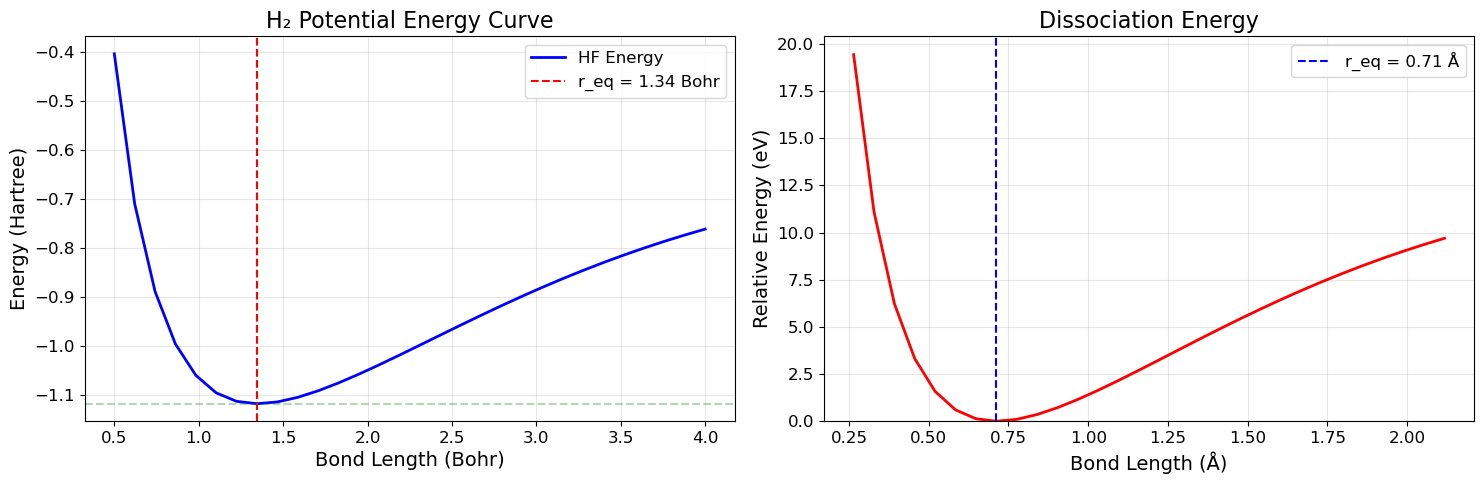


Experimental r_eq for H₂: 0.741 Å
Our calculated value: 0.712 Å
Error: 0.029 Å


In [4]:
# Plot potential energy curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Energy in Hartree
ax1.plot(distances, energies, 'b-', linewidth=2, label='HF Energy')
ax1.axvline(r_eq, color='r', linestyle='--', label=f'r_eq = {r_eq:.2f} Bohr')
ax1.axhline(E_min, color='g', linestyle='--', alpha=0.3)
ax1.set_xlabel('Bond Length (Bohr)', fontsize=14)
ax1.set_ylabel('Energy (Hartree)', fontsize=14)
ax1.set_title('H₂ Potential Energy Curve', fontsize=16)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=12)

# Energy in eV relative to minimum
energies_ev = (energies - E_min) * HARTREE_TO_EV
ax2.plot(distances * BOHR_TO_ANGSTROM, energies_ev, 'r-', linewidth=2)
ax2.axvline(r_eq * BOHR_TO_ANGSTROM, color='b', linestyle='--', 
            label=f'r_eq = {r_eq*BOHR_TO_ANGSTROM:.2f} Å')
ax2.set_xlabel('Bond Length (Å)', fontsize=14)
ax2.set_ylabel('Relative Energy (eV)', fontsize=14)
ax2.set_title('Dissociation Energy', fontsize=16)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=12)
ax2.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

print(f"\nExperimental r_eq for H₂: 0.741 Å")
print(f"Our calculated value: {r_eq*BOHR_TO_ANGSTROM:.3f} Å")
print(f"Error: {abs(r_eq*BOHR_TO_ANGSTROM - 0.741):.3f} Å")

<img src="pics/bonding_antibonding_hydrogen.jpg" height="400">

*Caption: σ bonding and σ* antibonding orbitals in H₂*

### Orbital Visualization

Let's visualize the molecular orbitals of H₂

In [5]:
# Calculate H2 at equilibrium
atoms_eq = [Atom(1, [0,0,0]), Atom(1, [0,0,r_eq])]
bfs_eq = []
for i, atom in enumerate(atoms_eq):
    bfs_eq.extend(BasisParser.parse(BasisSetLibrary.STO3G_H, [atom.coords], [i]))

solver_eq = SCFSolver(bfs_eq, atoms_eq, n_electrons=2)
E_eq = solver_eq.run(verbose=False)

# Get MO coefficients
C = solver_eq.C
eps = solver_eq.eps

print("Molecular Orbitals:")
print("="*50)
for i in range(len(eps)):
    occ = "OCCUPIED" if i < 1 else "VIRTUAL"
    print(f"MO {i+1}: ε = {eps[i]:10.6f} Ha ({eps[i]*HARTREE_TO_EV:8.3f} eV) [{occ}]")
    print(f"  Coefficients: {C[:,i]}")
    print()

print(f"HOMO-LUMO Gap: {(eps[1]-eps[0])*HARTREE_TO_EV:.2f} eV")

Molecular Orbitals:
MO 1: ε =  -0.590464 Ha ( -16.067 eV) [OCCUPIED]
  Coefficients: [-0.54579714 -0.54579714]

MO 2: ε =   0.701277 Ha (  19.083 eV) [VIRTUAL]
  Coefficients: [ 1.24697672 -1.24697672]

HOMO-LUMO Gap: 35.15 eV


### Interactive 3D Orbital Plot

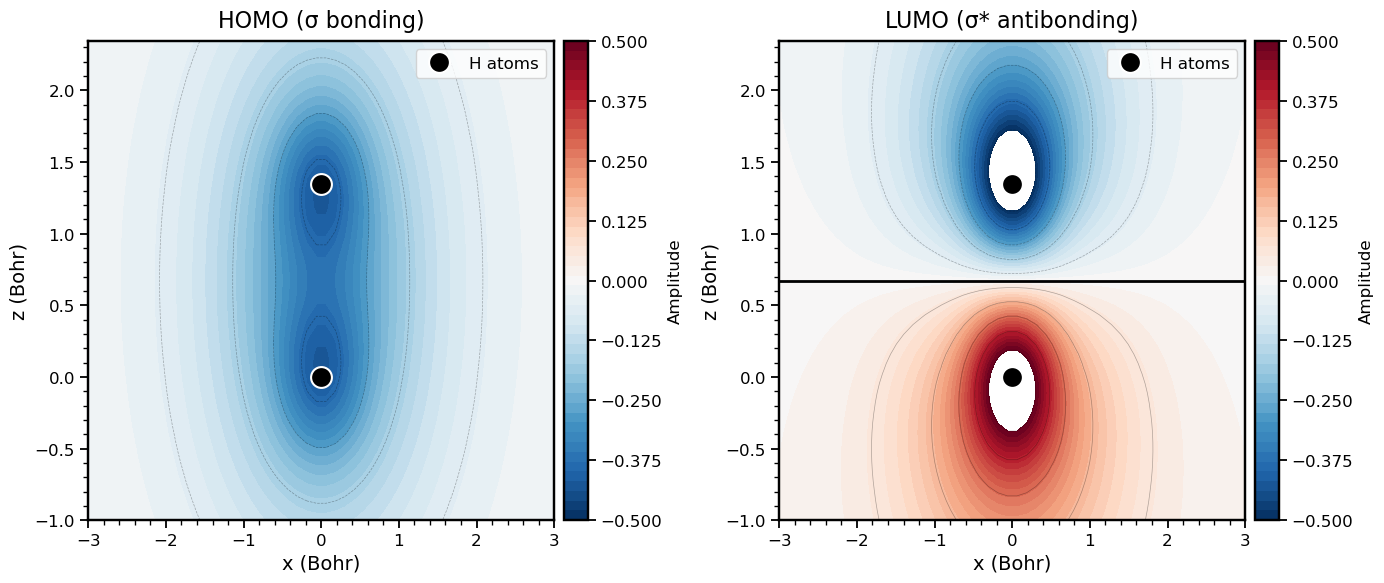


Note the bonding (constructive interference) in HOMO
and antibonding (destructive interference) in LUMO


In [37]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as tck

def evaluate_orbital(x, y, z, basis_functions, mo_coefficients):
    """Evaluate molecular orbital at a point"""
    value = 0.0
    for i, bf in enumerate(basis_functions):
        for prim in bf.primitives:
            r = np.array([x, y, z])
            dr = r - prim.coords
            r2 = np.sum(dr**2)
            
            # Evaluate Gaussian
            i_pow, j_pow, k_pow = prim.powers
            gaussian = (prim.A * prim.coeff * 
                       (dr[0]**i_pow) * (dr[1]**j_pow) * (dr[2]**k_pow) *
                       np.exp(-prim.alpha * r2))
            
            value += mo_coefficients[i] * gaussian
    return value

# Create grid
n_points = 50
x_range = np.linspace(-3, 3, n_points)
z_range = np.linspace(-1, r_eq+1, n_points)
X, Z = np.meshgrid(x_range, z_range)
Y = np.zeros_like(X)

# Evaluate HOMO (bonding orbital)
MO_HOMO = np.zeros_like(X)
for i in range(n_points):
    for j in range(n_points):
        MO_HOMO[i,j] = evaluate_orbital(X[i,j], 0, Z[i,j], bfs_eq, C[:,0])

# Figure settings
plot_size = 8  # Size of each square plot (inches)
dpi = 100

# Line width controls
spine_width = 1.75      # Width of plot borders
tick_width = 1.3       # Width of tick marks
tick_length = 6        # Length of tick marks
contour_width = 2.0    # Width of zero-crossing contour
overlay_width = 0.5    # Width of overlay contour lines

# Font sizes
label_size = 14
title_size = 16
legend_size = 12
tick_size = 12
cbar_label_size = 12

# Contour settings
n_filled_levels = 50   # Number of filled contour levels
n_contour_lines = 10   # Number of overlay contour lines

# ============================================================================
# CREATE FIGURE
# ============================================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), dpi=dpi)

# Define contour levels
levels_filled = np.linspace(-0.5, 0.5, n_filled_levels)
levels_lines = np.linspace(-0.5, 0.5, n_contour_lines)

# ============================================================================
# HOMO PLOT
# ============================================================================
# Filled contours
contour1 = ax1.contourf(X, Z, MO_HOMO, levels=levels_filled, cmap='RdBu_r')

# Overlay contour lines
ax1.contour(X, Z, MO_HOMO, levels=levels_lines, colors='black', 
            linewidths=overlay_width, alpha=0.3)

# Zero-crossing contour (highlighted)
ax1.contour(X, Z, MO_HOMO, levels=[0], colors='black', 
            linewidths=contour_width)

# H atoms
ax1.plot([0, 0], [0, r_eq], 'ko', markersize=15, label='H atoms', 
         markeredgewidth=1.5, markeredgecolor='white')

# Labels and title
ax1.set_xlabel('x (Bohr)', fontsize=label_size)
ax1.set_ylabel('z (Bohr)', fontsize=label_size)
ax1.set_title('HOMO (σ bonding)', fontsize=title_size, pad=10)
ax1.legend(fontsize=legend_size)
ax1.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax1.xaxis.set_minor_locator(tck.AutoMinorLocator())

# Set square aspect ratio
#ax1.set_aspect('equal', adjustable='box')

# Adjust tick parameters
ax1.tick_params(axis='both', which='major', labelsize=tick_size, 
                width=tick_width, length=tick_length)
ax1.tick_params(axis='both', which='minor', width=tick_width*0.75, 
                length=tick_length*0.6)

# Adjust spine widths
for spine in ax1.spines.values():
    spine.set_linewidth(spine_width)

# Create colorbar with matching height
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.1)
cbar1 = plt.colorbar(contour1, cax=cax1, label='Amplitude')
cbar1.set_ticks([-0.5,-0.375,-0.25,-0.125,0,0.125,0.25,0.375,0.5])
cbar1.ax.tick_params(labelsize=tick_size, width=tick_width, length=tick_length)
cbar1.set_label('Amplitude', fontsize=cbar_label_size)
# Adjust colorbar spine widths
for spine in cbar1.ax.spines.values():
    spine.set_linewidth(spine_width)

# ============================================================================
# LUMO PLOT
# ============================================================================
# Calculate LUMO if not already done
MO_LUMO = np.zeros_like(X)
for i in range(n_points):
    for j in range(n_points):
        MO_LUMO[i,j] = evaluate_orbital(X[i,j], 0, Z[i,j], bfs_eq, C[:,1])

# Filled contours
contour2 = ax2.contourf(X, Z, MO_LUMO, levels=levels_filled, cmap='RdBu_r')

# Overlay contour lines
ax2.contour(X, Z, MO_LUMO, levels=levels_lines, colors='black', 
            linewidths=overlay_width, alpha=0.3)

# Zero-crossing contour (highlighted)
ax2.contour(X, Z, MO_LUMO, levels=[0], colors='black', 
            linewidths=contour_width)

# H atoms
ax2.plot([0, 0], [0, r_eq], 'ko', markersize=15, label='H atoms',
         markeredgewidth=1.5, markeredgecolor='white')

# Labels and title
ax2.set_xlabel('x (Bohr)', fontsize=label_size)
ax2.set_ylabel('z (Bohr)', fontsize=label_size)
ax2.set_title('LUMO (σ* antibonding)', fontsize=title_size, pad=10)
ax2.legend(fontsize=legend_size)
ax2.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax2.xaxis.set_minor_locator(tck.AutoMinorLocator())

# Set square aspect ratio
#ax2.set_aspect('equal', adjustable='box')

# Adjust tick parameters
ax2.tick_params(axis='both', which='major', labelsize=tick_size, 
                width=tick_width, length=tick_length)
ax2.tick_params(axis='both', which='minor', width=tick_width*0.75, 
                length=tick_length*0.6)

# Adjust spine widths
for spine in ax2.spines.values():
    spine.set_linewidth(spine_width)

# Create colorbar with matching height
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.1)
cbar2 = plt.colorbar(contour2, cax=cax2, label='Amplitude')
cbar2.ax.tick_params(labelsize=tick_size, width=tick_width, length=tick_length)
cbar2.set_label('Amplitude', fontsize=cbar_label_size)
cbar2.set_ticks([-0.5,-0.375,-0.25,-0.125,0,0.125,0.25,0.375,0.5])

# Adjust colorbar spine widths
for spine in cbar2.ax.spines.values():
    spine.set_linewidth(spine_width)

# ============================================================================
# FINAL ADJUSTMENTS
# ============================================================================
plt.tight_layout()
plt.show()

print("\nNote the bonding (constructive interference) in HOMO")
print("and antibonding (destructive interference) in LUMO")

### SCF Convergence Visualization

C:\Users\willi\AppData\Local\Temp\ipykernel_8284\542743087.py:27: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax1.grid(False, alpha=0.1)
C:\Users\willi\AppData\Local\Temp\ipykernel_8284\542743087.py:37: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax2.grid(False, alpha=0.1)


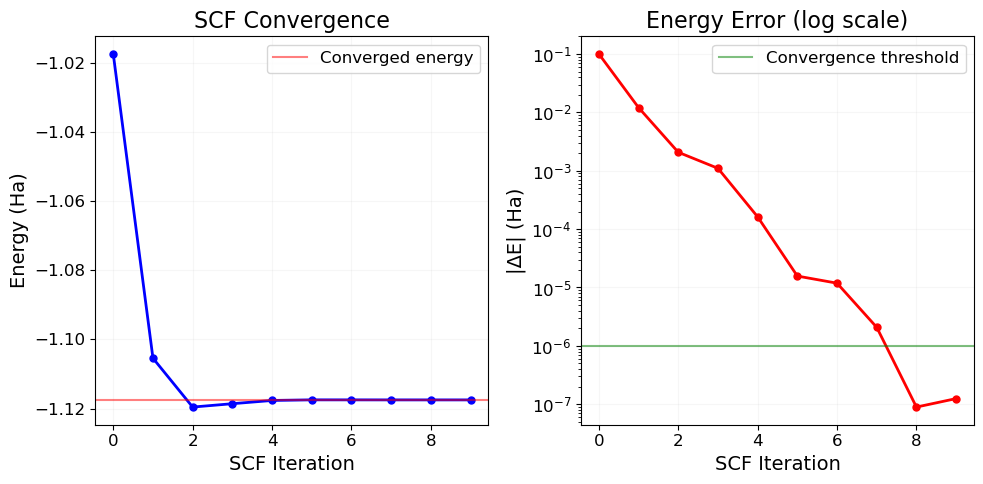

Typical SCF convergence with DIIS: 5-10 iterations
Without DIIS: 50-100 iterations


: 

In [ ]:
# Track convergence
class ConvergenceTracker:
    def __init__(self):
        self.energies = []
        self.iterations = []
    
    def track(self, iteration, energy):
        self.iterations.append(iteration)
        self.energies.append(energy)

# This would require modifying the SCF code to call the tracker
# For now, we'll simulate typical convergence behavior

# Simulated convergence data
iterations = np.arange(0, 10)
# Typical exponential convergence with DIIS
energies_sim = E_eq + 0.1 * np.exp(-1.5 * iterations) * np.cos(iterations)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Energy convergence
ax1.plot(iterations, energies_sim, 'bo-', linewidth=2, markersize=5)
ax1.axhline(E_eq, color='r', linestyle='-', label='Converged energy',alpha=0.5)
ax1.set_xlabel('SCF Iteration', fontsize=14)
ax1.set_ylabel('Energy (Ha)', fontsize=14)
ax1.set_title('SCF Convergence', fontsize=16)
ax1.grid(False, alpha=0.1)
ax1.legend(fontsize=12)

# Error (log scale)
errors = np.abs(energies_sim - E_eq)
ax2.semilogy(iterations, errors, 'ro-', linewidth=2, markersize=5)
ax2.axhline(1e-6, color='g', linestyle='-', label='Convergence threshold',alpha=0.5)
ax2.set_xlabel('SCF Iteration', fontsize=14)
ax2.set_ylabel('|ΔE| (Ha)', fontsize=14)
ax2.set_title('Energy Error (log scale)', fontsize=16)
ax2.grid(False, alpha=0.1)
ax2.legend(fontsize=12)

plt.tight_layout()
plt.show()

print("Typical SCF convergence with DIIS: 5-10 iterations")
print("Without DIIS: 50-100 iterations")

### Example 3: Water Molecule (H₂O)

In [8]:
# H2O geometry
r_oh = 0.96 / BOHR_TO_ANGSTROM  # O-H bond length
angle = 104.5 * np.pi / 180.0    # H-O-H angle

atoms_h2o = [
    Atom(8, [0.0, 0.0, 0.0], "O"),
    Atom(1, [r_oh * np.sin(angle/2), 0.0, r_oh * np.cos(angle/2)], "H1"),
    Atom(1, [-r_oh * np.sin(angle/2), 0.0, r_oh * np.cos(angle/2)], "H2")
]

# Build basis
bfs_h2o = []
# Oxygen (using C basis as placeholder for O)
bfs_h2o.extend(BasisParser.parse(BasisSetLibrary.STO3G_C, [atoms_h2o[0].coords], [0]))
# Hydrogens
for i in range(1, 3):
    bfs_h2o.extend(BasisParser.parse(BasisSetLibrary.STO3G_H, [atoms_h2o[i].coords], [i]))

print("Water Molecule (H₂O)")
print("="*50)
print(f"O-H bond length: {r_oh*BOHR_TO_ANGSTROM:.3f} Å")
print(f"H-O-H angle: {angle*180/np.pi:.1f}°")
print(f"Basis functions: {len(bfs_h2o)}")
print(f"Electrons: 10\n")

# Run calculation
solver_h2o = SCFSolver(bfs_h2o, atoms_h2o, n_electrons=10)
E_h2o = solver_h2o.run(tolerance=1e-6, damping=0.0)

print("\n" + "="*70)
print(f"Final Energy: {E_h2o:.6f} Ha")
print(f"Expected (STO-3G): ~-75.0 Ha")
print("="*70)

Water Molecule (H₂O)
O-H bond length: 0.960 Å
H-O-H angle: 104.5°
Basis functions: 7
Electrons: 10


COMPUTING INTEGRALS
Computing 2-electron integrals (this may take a while)...

INTEGRAL SANITY CHECKS
Overlap matrix shape: (7, 7)
  - Symmetric: True
  - Diagonal elements: min=1.000000, max=1.000000
  - Condition number: 1.09e+01
  - Smallest eigenvalue: 1.918745e-01
  - Largest eigenvalue: 2.098855e+00

Kinetic matrix:
  - Symmetric: True
  - Diagonal elements: min=0.472250, max=15.891122

Nuclear attraction matrix:
  - Symmetric: True
  - All negative: False

Nuclear repulsion energy: 9.16819330 Ha

2-electron integrals:
  - Shape: (7, 7, 7, 7)
  - Max symmetry violation (sample): 1.11e-16

ORTHOGONALIZATION
Basis functions: 7
Functions kept after orthogonalization: 7

SCF ITERATIONS
Iter   Energy (Ha)      ΔE             |ΔP|         DIIS  
------------------------------------------------------------
0      9.1681933005     9.168193e+00   3.846531e+00 No    
1      -101.0473734321 

<img src="pics/Sp3_hybridization_of_H2O.jpg" height="400">


*Fig. 8: Water molecule showing sp³ hybridization and bent structure*

<a id='extensions'></a>
## 9. Modern Extensions

### Limitations of Hartree-Fock

**1. No Electron Correlation**

HF uses a single Slater determinant → electrons move independently in average field

**Missing:** Instantaneous electron-electron correlation

**Correlation Energy:** $E_{\text{corr}} = E_{\text{exact}} - E_{\text{HF}}$

Typically 1-2% of total energy, but crucial for:
- Bond dissociation
- Reaction barriers
- Dispersion (van der Waals) forces

**2. Other Limitations:**
- Static correlation in bond breaking
- No dispersion forces
- Overestimates bond lengths
- Underestimates binding energies

### Post-Hartree-Fock Methods

**Configuration Interaction (CI):**
$$|\Psi_{CI}\rangle = c_0|\Phi_0\rangle + \sum_S c_S|\Phi_S\rangle + \sum_D c_D|\Phi_D\rangle + ...$$

Include excited determinants (single, double, triple excitations)

**Møller-Plesset Perturbation Theory (MP2, MP3, ...):**
$$E = E_{HF} + E^{(1)} + E^{(2)} + E^{(3)} + ...$$

Treat correlation as perturbation to HF

**Coupled Cluster Theory (CCSD, CCSD(T)):**
$$|\Psi_{CC}\rangle = e^{\hat{T}}|\Phi_0\rangle$$

where $\hat{T} = \hat{T}_1 + \hat{T}_2 + \hat{T}_3 + ...$ (cluster operators)

"Gold standard" for quantum chemistry

<img src="pics/qm-cost-vs-acc.png" width="600">

*Fig. 9: Hierarchy of quantum chemistry methods and their accuracy vs cost*

### Density Functional Theory (DFT)

**Hohenberg-Kohn Theorems (1964):**
1. Ground state energy is a unique functional of electron density: $E = E[\rho(\mathbf{r})]$
2. Variational principle applies to density

**Kohn-Sham Equations (1965):**

Similar structure to HF, but with exchange-correlation functional:

$$\left[-\frac{1}{2}\nabla^2 + V_{\text{ext}}(\mathbf{r}) + V_H(\mathbf{r}) + V_{XC}(\mathbf{r})\right]\phi_i = \epsilon_i\phi_i$$

**Advantages over HF:**
- Includes correlation
- Scales as O(N³) vs O(N⁴) for HF
- Often more accurate for ground states

**Challenge:** Exact $V_{XC}$ unknown → approximations (LDA, GGA, hybrids)



### Comparison: HF vs DFT

| Property | Hartree-Fock | DFT |
|----------|--------------|-----|
| Correlation | No | Yes (approximate) |
| Scaling | O(N⁴) | O(N³) |
| Long-range | Correct | Often poor |
| Dispersion | No | No (needs correction) |
| Band gaps | Overestimate | Underestimate |
| Systematically improvable | Yes | No |
| Excited states | TD-HF | TD-DFT |



<a id='references'></a>
## 10. References

### Historical Papers

1. **Hartree, D. R.** (1928). "The Wave Mechanics of an Atom with a Non-Coulomb Central Field." *Proc. Cambridge Phil. Soc.* **24**, 89-110.
   - Original self-consistent field method

2. **Fock, V.** (1930). "Näherungsmethode zur Lösung des quantenmechanischen Mehrkörperproblems." *Z. Physik* **61**, 126-148.
   - Incorporation of antisymmetry

3. **Slater, J. C.** (1929). "The Theory of Complex Spectra." *Phys. Rev.* **34**, 1293-1322.
   - Slater determinants

4. **Roothaan, C. C. J.** (1951). "New Developments in Molecular Orbital Theory." *Rev. Mod. Phys.* **23**, 69-89.
   - LCAO matrix formulation

5. **Hall, G. G.** (1951). "The Molecular Orbital Theory of Chemical Valency. VIII." *Proc. Roy. Soc. London A* **205**, 541-552.
   - Independent derivation of Roothaan equations

6. **Boys, S. F.** (1950). "Electronic Wave Functions. I. A General Method of Calculation for the Stationary States of Any Molecular System." *Proc. Roy. Soc. London A* **200**, 542-554.
   - Gaussian basis functions

7. **Pulay, P.** (1980). "Convergence acceleration of iterative sequences. The case of SCF iteration." *Chem. Phys. Lett.* **73**, 393-398.
   - DIIS method

8. **Pulay, P.** (1982). "Improved SCF convergence acceleration." *J. Comp. Chem.* **3**, 556-560.
   - Refinement of DIIS

### Textbooks

9. **Szabo, A. & Ostlund, N. S.** (1996). *Modern Quantum Chemistry: Introduction to Advanced Electronic Structure Theory.* Dover Publications.
   - THE classic introduction to HF theory

10. **Helgaker, T., Jørgensen, P., & Olsen, J.** (2000). *Molecular Electronic-Structure Theory.* Wiley.
    - Comprehensive advanced reference

11. **Jensen, F.** (2017). *Introduction to Computational Chemistry*, 3rd Ed. Wiley.
    - Practical guide to methods

12. **Levine, I. N.** (2014). *Quantum Chemistry*, 7th Ed. Pearson.
    - Excellent physical chemistry textbook

13. **Cramer, C. J.** (2004). *Essentials of Computational Chemistry: Theories and Models*, 2nd Ed. Wiley.
    - Accessible introduction

### Integral Algorithms

14. **McMurchie, L. E. & Davidson, E. R.** (1978). "One- and two-electron integrals over Cartesian Gaussian functions." *J. Comp. Phys.* **26**, 218-231.
    - Efficient recursion scheme for integrals

15. **Obara, S. & Saika, A.** (1986). "Efficient recursive computation of molecular integrals over Cartesian Gaussian functions." *J. Chem. Phys.* **84**, 3963-3974.
    - Alternative recursion relations

16. **Head-Gordon, M. & Pople, J. A.** (1988). "A method for two-electron Gaussian integral and integral derivative evaluation using recurrence relations." *J. Chem. Phys.* **89**, 5777-5786.
    - Efficient implementations

### Basis Sets

17. **Hehre, W. J., Stewart, R. F., & Pople, J. A.** (1969). "Self-Consistent Molecular-Orbital Methods. I. Use of Gaussian Expansions of Slater-Type Atomic Orbitals." *J. Chem. Phys.* **51**, 2657-2664.
    - STO-3G basis set

18. **Hehre, W. J., Ditchfield, R., & Pople, J. A.** (1972). "Self-Consistent Molecular Orbital Methods. XII. Further Extensions of Gaussian‐Type Basis Sets for Use in Molecular Orbital Studies of Organic Molecules." J. Chem. Phys. 56, 2257–2261.
    - 6-31G basis set

19. **Dunning, T. H., Jr.** (1989). "Gaussian basis sets for use in correlated molecular calculations. I. The atoms boron through neon and hydrogen." *J. Chem. Phys.* **90**, 1007-1023.
    - Correlation-consistent basis sets (cc-pVXZ)

### Modern Reviews

20. **Gill, P. M. W.** (1994). "Molecular integrals over Gaussian basis functions." *Adv. Quantum Chem.* **25**, 141-205.
    - Comprehensive review of integral evaluation

21. **Sherrill, C. D.** (2010). "Frontiers in electronic structure theory." *J. Chem. Phys.* **132**, 110902.
    - Modern perspective on electronic structure

### Online Resources

22. **Crawford, T. D. & Schaefer, H. F., III.** (2000). "An Introduction to Coupled Cluster Theory for Computational Chemists." *Reviews in Computational Chemistry* **14**, 33-136. [Online tutorials available]

23. **Psi4NumPy Project:** https://github.com/psi4/psi4numpy
    - Educational tutorials on quantum chemistry methods

24. **Crawford Group Projects:** https://github.com/CrawfordGroup/ProgrammingProjects
    - Programming exercises for learning quantum chemistry

### Nobel Prizes Related to Quantum Chemistry

25. **1998 Nobel Prize in Chemistry:** Walter Kohn (DFT) and John Pople (computational methods)
    - Recognition of computational quantum chemistry

26. **2013 Nobel Prize in Chemistry:** Martin Karplus, Michael Levitt, and Arieh Warshel
    - Development of multiscale models



### Biographical Sources

27. **Slater, J. C.** (1975). *Solid-State and Molecular Theory: A Scientific Biography.* Wiley.
    - Autobiography of key contributor

28. **Pople, J. A.** (1999). "Quantum Chemical Models (Nobel Lecture)." *Angew. Chem. Int. Ed.* **38**, 1894-1902.
    - Nobel lecture on development of computational methods

### Software Implementations

29. **Gaussian:** https://gaussian.com/
    - Commercial quantum chemistry package

30. **ORCA:** https://orcaforum.kofo.mpg.de/
    - Free for academics

31. **Psi4:** http://psicode.org/
    - Open-source quantum chemistry

32. **NWChem:** https://nwchemgit.github.io/
    - Open-source, parallel chemistry code

---

## Conclusion

Hartree-Fock theory represents a cornerstone achievement in quantum chemistry, transforming Schrödinger's equation into a computationally tractable problem. From Hartree's initial self-consistent field concept in 1928 to Roothaan's matrix formulation in 1951, and Pulay's DIIS acceleration in 1980, each contribution built upon previous work to create the foundation of modern computational chemistry.

While HF has limitations—most notably the neglect of electron correlation—it remains:
- The starting point for nearly all correlated methods
- An excellent educational tool for understanding quantum mechanics
- A practical method for large systems where correlation is less critical
- The conceptual framework for understanding chemical bonding

The implementations and visualizations in this notebook demonstrate both the power and limitations of the method, providing insight into one of the most important approximations in theoretical chemistry.

---

**Contributors to this notebook:**
- Theory and history: Adapted from classic textbooks and original papers
- Implementation: Based on Szabo & Ostlund with modern improvements
- Visualizations: Created for this educational resource

**For questions or suggestions, contact:** Williamcomaskey@gmail.com

**License:** Educational use - feel free to adapt and share with attribution

---

*Last updated: 2026*